# Маркировка датасета

In [1]:
%pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
from tqdm import tqdm


nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\axel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
DATASET_PATH = "../datasets"

news_path = os.path.join(DATASET_PATH, "neftegaz.ru_news_list_price.csv")

In [4]:
news_df = pd.read_csv(news_path)

news_df

,date,headline,description,article,close,open,high,low
0,2024-04-27,PetroChina почти месяц не могла выгрузить парт...,"А. Данготе хотел больше прибыли, покупая нефть...",Китайская государственная энергетическая компа...,89.50,89.21,89.83,88.80
1,2024-04-27,Цены на нефть выросли по итогам предыдущей сес...,За минувшую неделю цена Brent увеличилась на 2...,Цены на нефть завершили неделю в плюсе.\n\n26 ...,89.50,89.21,89.83,88.80
2,2024-04-26,Индия вновь принимает нефть из России на танке...,"Владимир Тихонов, принадлежащий Совкомфлоту, н...","Нефтеналивной танкер, который принадлежит нахо...",89.50,89.21,89.83,88.80
3,2024-04-26,Чехия в 2025 г. будет получать нефть из 20 гос...,"С 2025 г. по трубопроводу TAL в Чехию, будет п...",Чехия в 2025 г. после расширения мощностей тра...,89.50,89.21,89.83,88.80
4,2024-04-26,Нефть дорожает и завершает неделю в плюсе,"За неделю Brent подорожала на 2,4%, WTI - на 0...",Цены на нефть растут.\n\n25 апреля 2024 г. сто...,89.50,89.21,89.83,88.80
...,...,...,...,...,...,...,...,...
10023,2016-08-30,Укрнафта может приостановить добычу нефти и га...,Укрнафта может приостановить добычу нефти и га...,Укрнафта может приостановить добычу нефти и га...,46.89,49.30,49.76,48.26
10024,2016-08-30,Корабли Тихоокеанского флота провели артиллери...,Корабельная группа Тихоокеанского флота в сост...,Корабельная группа Тихоокеанского флота в сост...,46.89,49.30,49.76,48.26
10025,2016-08-30,BP остановит работу добывающей платформы на бл...,BP в сентябре 2016 г остановит работу платформ...,BP в сентябре 2016 г остановит работу платформ...,46.89,49.30,49.76,48.26
10026,2016-08-30,На НПЗ Petromidia после пожара решили провести...,Нефтеперерабатывающий завод Petromidia в Румын...,Нефтеперерабатывающий завод Petromidia в Румын...,46.89,49.30,49.76,48.26


### Удаляем стоп слова

In [5]:
russian_stopwords = stopwords.words("russian")

### Выполняем лематизацию текста

In [6]:
def get_lemmatized_words(texts):
    morph = MorphAnalyzer()
    lemmatized_words = []

    for text in tqdm(texts):
        words = text.split()
        lemmatized_words.append(
            [morph.parse(word)[0].normal_form.strip() for word in words]
        )

    return lemmatized_words

In [7]:
def plot_common_words(dataframe, column="title"):
    # Convert the column to lowercase
    lowercase_column = dataframe[column].str.lower()

    # Drop NA values
    lowercase_column.dropna(inplace=True)

    # Lemmatize words and remove stopwords
    lemmatized_words = get_lemmatized_words(lowercase_column)
    filtered_words = [
        " ".join(filter(lambda x: x not in russian_stopwords, words))
        for words in lemmatized_words
    ]

    # Extract words and count their occurrences
    word_counts = (
        pd.Series(filtered_words)
        .str.extractall(r"(\w+)")
        .reset_index()[0]
        .value_counts()
    )

    # Print the word counts
    print(word_counts)

    # Plot the word counts
    word_counts.plot(loglog=True, title="Zipf Plot", xlabel="Rank", ylabel="Frequency")

    # Return the word counts
    return word_counts

100%|██████████| 10028/10028 [00:13<00:00, 769.97it/s]


0
нефть         6168
г             2507
цена          1744
добыча        1668
сша           1507
              ... 
йорк             1
нью              1
emerging         1
transition       1
1200             1
Name: count, Length: 9629, dtype: int64


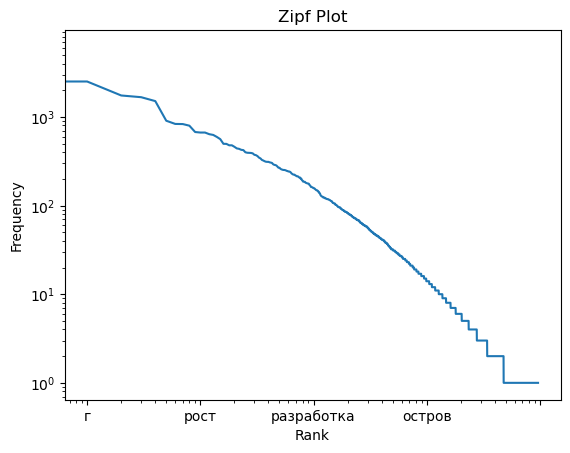

In [8]:
word_counts = plot_common_words(news_df, "headline")

### Вычленяем популярные негативные и позитивные слова

In [ ]:
word_counts.keys().tolist()

In [32]:
positive_words = [
    "рост",
    "увеличить",
    "вырасти",
    "начать",
    "начало",
    "хороший",
    "прибыль",
    "восстановление",
    "перспектива",
    "превысить",
    "запустить",
    "очередной",
    "первый",
    "принять",
    "рекордный",
    "стратегический",
    "успешно",
    "возможность",
    "результат",
    "экономика",
    "высокий",
    "максимум",
    "позитивный",
    "оптимизм",
    "эффективность",
    "стабильность",
    "стабильный",
    "поддержка",
    "прирост",
    "темп",
    "призвать",
    "эффект",
    "уникальный",
    "значительно",
    "финансирование",
    "уверенно",
    "лидер",
    "серьёзный",
    "уверенный",
    "комплексный",
    "разрабатывать",
    "инвестиционный",
    "усиление",
    "продукция",
    "развивать",
    "ключевой",
]

In [23]:
negative_words = [
    "аварийная ситуация",
    "аварийный",
    "авария",
    "взрыв",
    "вниз",
    "война",
    "дефицит",
    "дефицитный",
    "дешеветь",
    "жертвы",
    "забастовка",
    "загрязнение",
    "запрет",
    "инцидент",
    "катастрофа",
    "конфликт",
    "кризис",
    "минус",
    "нарушение",
    "нарушитель",
    "негативный",
    "неоднозначный",
    "неожиданный",
    "неопределённость",
    "несчастный случай",
    "нехватка",
    "обвал",
    "ограничение",
    "опасение",
    "падать",
    "падение",
    "пожар",
    "проблема",
    "протест",
    "разлив",
    "резкий",
    "рецессия",
    "риск",
    "санкции",
    "слабо",
    "снижение",
    "сокращение",
    "спад",
    "трагедия",
    "трудный",
    "убыток",
    "угроза",
    "утечка",
    "утечка",
    "ущерб",
    "хмао",
    "штраф",
    "экологическая катастрофа",
    "экологический ущерб",
    "экономический кризис",
]

In [29]:
news_df

,date,headline,description,article,close,open,high,low,lemmatized_article
0,2024-04-27,PetroChina почти месяц не могла выгрузить парт...,"А. Данготе хотел больше прибыли, покупая нефть...",Китайская государственная энергетическая компа...,89.50,89.21,89.83,88.80,"[китайский, государственный, энергетический, к..."
1,2024-04-27,Цены на нефть выросли по итогам предыдущей сес...,За минувшую неделю цена Brent увеличилась на 2...,Цены на нефть завершили неделю в плюсе.\n\n26 ...,89.50,89.21,89.83,88.80,"[цена, на, нефть, завершить, неделя, в, плюсе...."
2,2024-04-26,Индия вновь принимает нефть из России на танке...,"Владимир Тихонов, принадлежащий Совкомфлоту, н...","Нефтеналивной танкер, который принадлежит нахо...",89.50,89.21,89.83,88.80,"[нефтеналивной, танкер,, который, принадлежать..."
3,2024-04-26,Чехия в 2025 г. будет получать нефть из 20 гос...,"С 2025 г. по трубопроводу TAL в Чехию, будет п...",Чехия в 2025 г. после расширения мощностей тра...,89.50,89.21,89.83,88.80,"[чехия, в, 2025, г., после, расширение, мощнос..."
4,2024-04-26,Нефть дорожает и завершает неделю в плюсе,"За неделю Brent подорожала на 2,4%, WTI - на 0...",Цены на нефть растут.\n\n25 апреля 2024 г. сто...,89.50,89.21,89.83,88.80,"[цена, на, нефть, растут., 25, апрель, 2024, г..."
...,...,...,...,...,...,...,...,...,...
10023,2016-08-30,Укрнафта может приостановить добычу нефти и га...,Укрнафта может приостановить добычу нефти и га...,Укрнафта может приостановить добычу нефти и га...,46.89,49.30,49.76,48.26,"[укрнафт, мочь, приостановить, добыча, нефть, ..."
10024,2016-08-30,Корабли Тихоокеанского флота провели артиллери...,Корабельная группа Тихоокеанского флота в сост...,Корабельная группа Тихоокеанского флота в сост...,46.89,49.30,49.76,48.26,"[корабельный, группа, тихоокеанский, флот, в, ..."
10025,2016-08-30,BP остановит работу добывающей платформы на бл...,BP в сентябре 2016 г остановит работу платформ...,BP в сентябре 2016 г остановит работу платформ...,46.89,49.30,49.76,48.26,"[bp, в, сентябрь, 2016, г, остановить, работа,..."
10026,2016-08-30,На НПЗ Petromidia после пожара решили провести...,Нефтеперерабатывающий завод Petromidia в Румын...,Нефтеперерабатывающий завод Petromidia в Румын...,46.89,49.30,49.76,48.26,"[нефтеперерабатывающий, завод, petromidia, в, ..."


### Выполняем лематизацию столбца `article`

In [ ]:
def lemmatized_column(df, column_name):
    morph = MorphAnalyzer()
    lemmatized_words = []

    for text in tqdm(df[column_name]):
        if type(text) == float:
            lemmatized_words.append([""])
        else:
            words = text.split()
            lemmatized_words.append(
                [morph.parse(word)[0].normal_form.strip() for word in words]
            )

    df["lemmatized_" + column_name] = lemmatized_words

    return df


news_df_lemmatized = lemmatized_column(news_df, "article")

In [21]:
news_df_lemmatized = news_df_lemmatized.drop(["headline", "description"], axis=1)
news_df_lemmatized

,date,article,close,open,high,low,lemmatized_article
0,2024-04-27,Китайская государственная энергетическая компа...,89.50,89.21,89.83,88.80,"[китайский, государственный, энергетический, к..."
1,2024-04-27,Цены на нефть завершили неделю в плюсе.\n\n26 ...,89.50,89.21,89.83,88.80,"[цена, на, нефть, завершить, неделя, в, плюсе...."
2,2024-04-26,"Нефтеналивной танкер, который принадлежит нахо...",89.50,89.21,89.83,88.80,"[нефтеналивной, танкер,, который, принадлежать..."
3,2024-04-26,Чехия в 2025 г. после расширения мощностей тра...,89.50,89.21,89.83,88.80,"[чехия, в, 2025, г., после, расширение, мощнос..."
4,2024-04-26,Цены на нефть растут.\n\n25 апреля 2024 г. сто...,89.50,89.21,89.83,88.80,"[цена, на, нефть, растут., 25, апрель, 2024, г..."
...,...,...,...,...,...,...,...
10023,2016-08-30,Укрнафта может приостановить добычу нефти и га...,46.89,49.30,49.76,48.26,"[укрнафт, мочь, приостановить, добыча, нефть, ..."
10024,2016-08-30,Корабельная группа Тихоокеанского флота в сост...,46.89,49.30,49.76,48.26,"[корабельный, группа, тихоокеанский, флот, в, ..."
10025,2016-08-30,BP в сентябре 2016 г остановит работу платформ...,46.89,49.30,49.76,48.26,"[bp, в, сентябрь, 2016, г, остановить, работа,..."
10026,2016-08-30,Нефтеперерабатывающий завод Petromidia в Румын...,46.89,49.30,49.76,48.26,"[нефтеперерабатывающий, завод, petromidia, в, ..."


### Подсчитываем сколько позитивных и негативных слов в новости

In [35]:
def count_words(df, column_name):
    count_positive_words = []
    count_negative_words = []
    label = []

    for words_list in tqdm(df[column_name]):
        count_positive = 0
        count_negative = 0
        for word in words_list:
            if word in positive_words:
                count_positive += 1
            elif word in negative_words:
                count_negative += 1
        count_positive_words.append(count_positive)
        count_negative_words.append(count_negative)
        label.append(1 if count_positive > count_negative else 0)

    df["count_positive_words"] = count_positive_words
    df["count_negative_words"] = count_negative_words
    df["label"] = label

    return df


news_df_counter = count_words(news_df_lemmatized, "lemmatized_article")
news_df_counter

100%|██████████| 10028/10028 [00:02<00:00, 3567.17it/s]


,date,article,close,open,high,low,lemmatized_article,count_positive_words,count_negative_words,label
0,2024-04-27,Китайская государственная энергетическая компа...,89.50,89.21,89.83,88.80,"[китайский, государственный, энергетический, к...",8,4,1
1,2024-04-27,Цены на нефть завершили неделю в плюсе.\n\n26 ...,89.50,89.21,89.83,88.80,"[цена, на, нефть, завершить, неделя, в, плюсе....",5,1,1
2,2024-04-26,"Нефтеналивной танкер, который принадлежит нахо...",89.50,89.21,89.83,88.80,"[нефтеналивной, танкер,, который, принадлежать...",5,0,1
3,2024-04-26,Чехия в 2025 г. после расширения мощностей тра...,89.50,89.21,89.83,88.80,"[чехия, в, 2025, г., после, расширение, мощнос...",3,0,1
4,2024-04-26,Цены на нефть растут.\n\n25 апреля 2024 г. сто...,89.50,89.21,89.83,88.80,"[цена, на, нефть, растут., 25, апрель, 2024, г...",11,4,1
...,...,...,...,...,...,...,...,...,...,...
10023,2016-08-30,Укрнафта может приостановить добычу нефти и га...,46.89,49.30,49.76,48.26,"[укрнафт, мочь, приостановить, добыча, нефть, ...",2,0,1
10024,2016-08-30,Корабельная группа Тихоокеанского флота в сост...,46.89,49.30,49.76,48.26,"[корабельный, группа, тихоокеанский, флот, в, ...",1,0,1
10025,2016-08-30,BP в сентябре 2016 г остановит работу платформ...,46.89,49.30,49.76,48.26,"[bp, в, сентябрь, 2016, г, остановить, работа,...",0,1,0
10026,2016-08-30,Нефтеперерабатывающий завод Petromidia в Румын...,46.89,49.30,49.76,48.26,"[нефтеперерабатывающий, завод, petromidia, в, ...",3,3,0


In [41]:
news_df_counter.label.value_counts()

label
1    7637
0    2391
Name: count, dtype: int64

### Сохраняем файл

In [43]:
news_df_counter.to_csv(
    os.path.join(DATASET_PATH, "neftegaz.ru_news_list_marked.csv"), index=False
)